In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/home/giovanni/Programs/Python3/DataAnalyst-course/Esercizi/Giorno 6/Health and Sleep relation 2024/Sleep_health_and_lifestyle_dataset.csv")
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [14]:
totale_persone_analizzate = len(df)
print(f"Totale persone analizzate: {totale_persone_analizzate}")

Totale persone analizzate: 374


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
# trasformiamo in valori numerici le colonne che contengono numeri
cols_to_convert = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [8]:
# fill empty sleep disorders with string "None"
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None").astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
# La colonna "Blood Pressure" è in formato "120/80". Crea due nuove colonne: Systolic e Diastolic (interi).
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,140,90
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,140,90
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80


In [10]:
# Quanto dormono in media uomini vs donne?
media_sonno = df.groupby("Gender")["Sleep Duration"].mean()
print(media_sonno)

Gender
Female    7.229730
Male      7.036508
Name: Sleep Duration, dtype: float64


In [12]:
# Quante persone riportano “Sleep Apnea” rispetto a nessun disturbo?
disturbi_sonno = df["Sleep Disorder"].value_counts()
disturbi_sonno

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [13]:
disturbo_sleep_apnea = disturbi_sonno.get("Sleep Apnea", 0)
nessun_disturbo = disturbi_sonno.get("None", 0)

print(f"Persone con Sleep Apnea: {disturbo_sleep_apnea}")
print(f"Persone senza disturbi del sonno: {nessun_disturbo}")

Persone con Sleep Apnea: 78
Persone senza disturbi del sonno: 219


In [19]:
bmi_categories = df['BMI Category'].unique()
bmi_categories

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [24]:
# unisci le categorie Normal Weight e Normal in una sola categoria
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal', 'Normal': 'Normal'})
bmi_categories = df['BMI Category'].unique()
bmi_categories

array(['Overweight', 'Normal', 'Obese'], dtype=object)

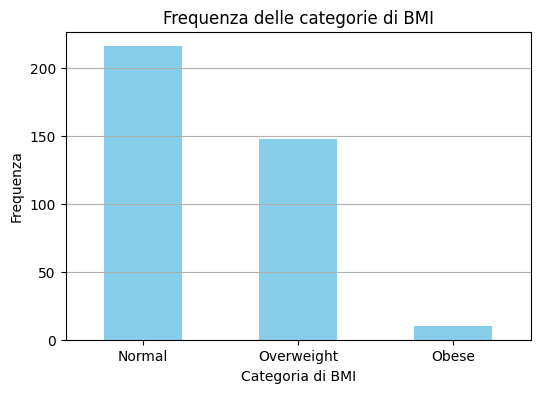

In [25]:
# plotta la frequenza delle categorie di BMI
plt.figure(figsize=(6, 4))
df['BMI Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequenza delle categorie di BMI')
plt.xlabel('Categoria di BMI')
plt.ylabel('Frequenza')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

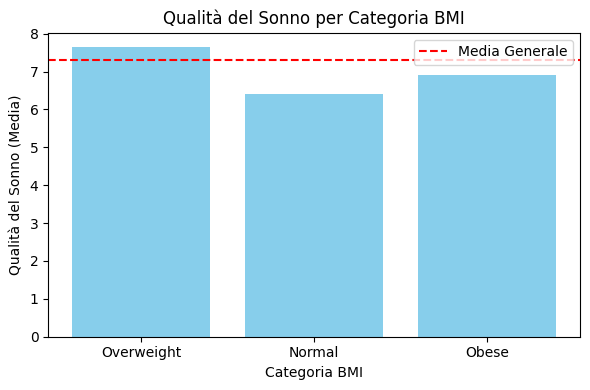

In [26]:
# La Qualità del sonno varia tra le categorie di BMI?
bmi_quality_sleep = df.groupby('BMI Category')['Quality of Sleep'].mean()

plt.figure(figsize=(6, 4))
plt.bar(bmi_categories, bmi_quality_sleep, color='skyblue')
plt.xlabel('Categoria BMI')
plt.ylabel('Qualità del Sonno (Media)')
plt.title('Qualità del Sonno per Categoria BMI')
plt.xticks(rotation=0)
# Aggiungi una linea orizzontale per la media generale della qualità del sonno
media_qualita_sonno = df['Quality of Sleep'].mean()
plt.axhline(media_qualita_sonno, color='red', linestyle='--', label='Media Generale')
plt.legend()
plt.tight_layout()
plt.show()

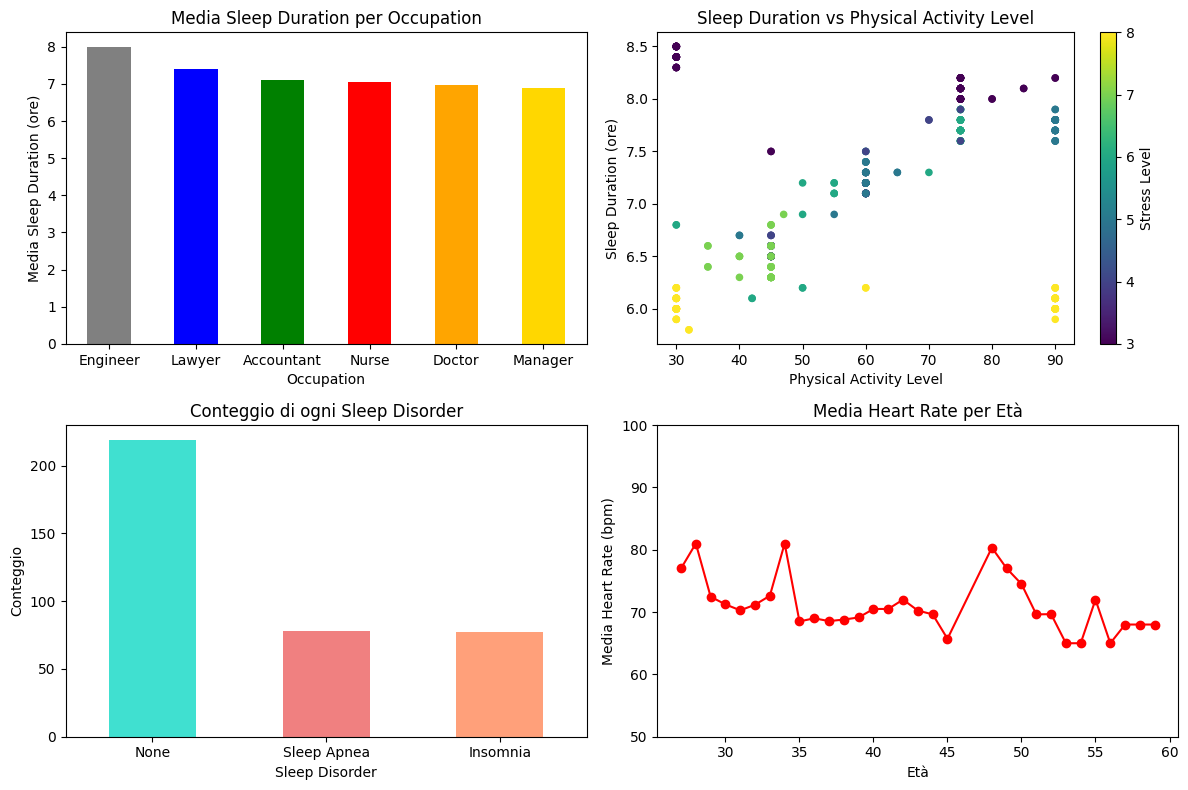

In [50]:
# Costruisci una figura con 4 grafici:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# (0, 0)	Bar plot	Media Sleep Duration per Occupation (mostra solo le 6 professioni più frequenti).
media_sonno_per_occupazione = df.groupby('Occupation')['Sleep Duration'].mean().sort_values(ascending=False).head(6)
media_sonno_per_occupazione.plot(kind='bar', ax=axs[0, 0], color=['grey', 'blue', 'green', 'red', 'orange', 'gold'])
axs[0, 0].set_title('Media Sleep Duration per Occupation')
axs[0, 0].set_xlabel('Occupation')
axs[0, 0].set_ylabel('Media Sleep Duration (ore)')
axs[0, 0].tick_params(axis='x', rotation=0)

# (0, 1)	Scatter	Sleep Duration vs Physical Activity Level; colora i punti in base a Stress Level.
df.plot.scatter(x='Physical Activity Level', y='Sleep Duration', c='Stress Level', colormap='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Sleep Duration vs Physical Activity Level')
axs[0, 1].set_xlabel('Physical Activity Level')
axs[0, 1].set_ylabel('Sleep Duration (ore)')

# (1, 0)	Bar plot	Conteggio di ogni Sleep Disorder (incluso "None").
disturbi_sonno.plot(kind='bar', ax=axs[1, 0], color=['turquoise', 'lightcoral', 'lightsalmon'])
axs[1, 0].set_title('Conteggio di ogni Sleep Disorder')
axs[1, 0].set_xlabel('Sleep Disorder')
axs[1, 0].set_ylabel('Conteggio')
axs[1, 0].tick_params(axis='x', rotation=0)

# (1, 1)    Line plot	Media Heart Rate per età.
df.groupby('Age')['Heart Rate'].mean().plot(kind='line', ax=axs[1, 1], color='red', marker='o')
axs[1, 1].set_title('Media Heart Rate per Età')
axs[1, 1].set_xlabel('Età')
axs[1, 1].set_ylabel('Media Heart Rate (bpm)')
axs[1, 1].set_ylim(50, 100)  # Imposta un limite per l'asse y

plt.tight_layout()
plt.show()


### Indagine mirata
1. Crea due subset (Apnea / None) e confronta Stress Level e Sleep Duration.
2. Filtra le persone con Stress Level ≥ 8 e Sleep Duration < 6. Calcola quante sono e la loro età media.

In [58]:
# Crea due subset (Apnea / None)
subset_apnea = df[df['Sleep Disorder'] == 'Sleep Apnea']
subset_none = df[df['Sleep Disorder'] == 'None']

# printa il totale contenuto in ogni subset
print(f"Totale persone con Sleep Apnea: {len(subset_apnea)}")
print(f"Totale persone senza disturbi del sonno: {len(subset_none)}")

Totale persone con Sleep Apnea: 78
Totale persone senza disturbi del sonno: 219


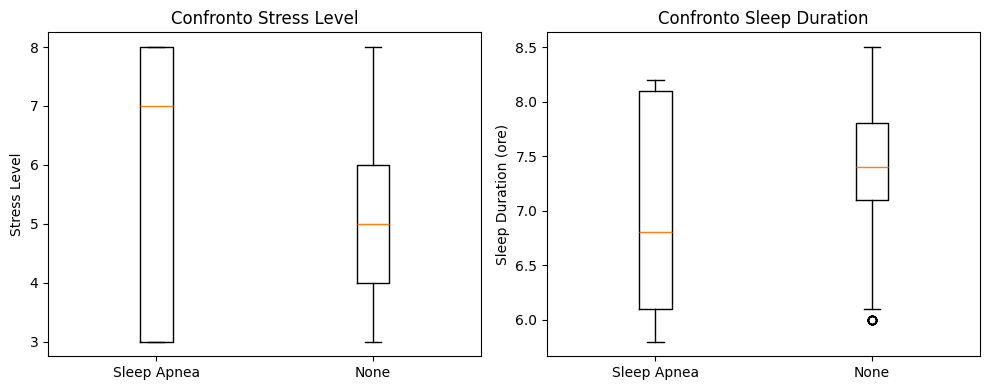

In [59]:

# Confronta Stress Level e Sleep Duration tra i due subset
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot([subset_apnea['Stress Level'], subset_none['Stress Level']], tick_labels=['Sleep Apnea', 'None'])
plt.title('Confronto Stress Level')
plt.ylabel('Stress Level')

plt.subplot(1, 2, 2)
plt.boxplot([subset_apnea['Sleep Duration'], subset_none['Sleep Duration']], tick_labels=['Sleep Apnea', 'None'])
plt.title('Confronto Sleep Duration')
plt.ylabel('Sleep Duration (ore)')

plt.tight_layout()
plt.show()


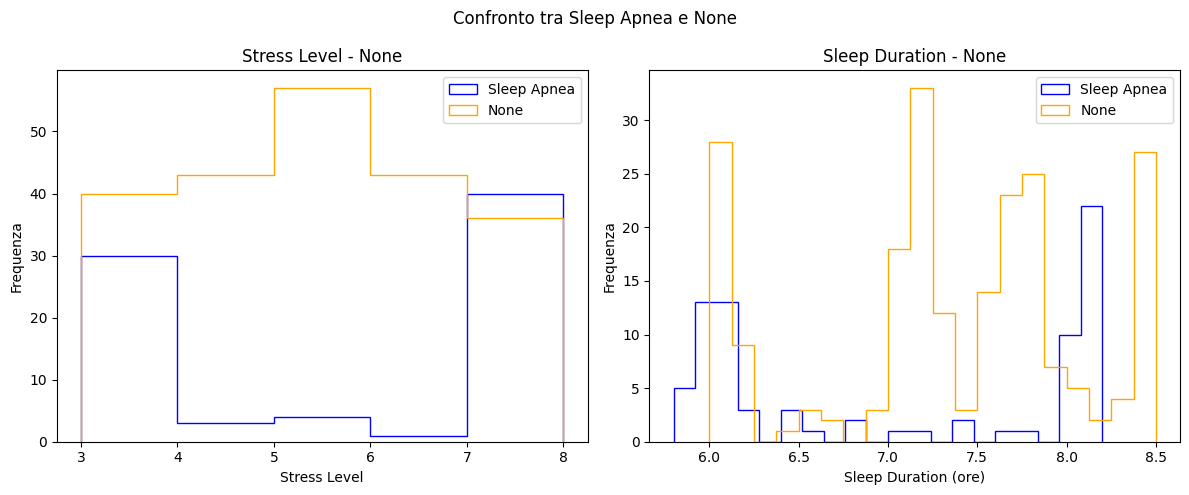

In [70]:
# plotta gli stessi dati su due istogrammi affiancati, per Stress Level su uno stesso grafico e Sleep Duration sull' altro
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(subset_apnea['Stress Level'], bins=5, edgecolor='blue', histtype='step')
plt.title('Stress Level - Sleep Apnea')
plt.xlabel('Stress Level')
plt.ylabel('Frequenza')

plt.hist(subset_none['Stress Level'], bins=5, edgecolor='orange', histtype='step')
plt.title('Stress Level - None')
plt.xlabel('Stress Level')
plt.ylabel('Frequenza')

plt.legend(['Sleep Apnea', 'None'])

plt.subplot(1, 2, 2)
plt.hist(subset_apnea['Sleep Duration'], bins=20, edgecolor='blue', histtype='step')
plt.title('Sleep Duration - Sleep Apnea')
plt.xlabel('Sleep Duration (ore)')
plt.ylabel('Frequenza')

plt.hist(subset_none['Sleep Duration'], bins=20, edgecolor='orange', histtype='step')
plt.title('Sleep Duration - None')
plt.xlabel('Sleep Duration (ore)')
plt.ylabel('Frequenza')

plt.legend(['Sleep Apnea', 'None'])

plt.suptitle('Confronto tra Sleep Apnea e None')

plt.tight_layout()
plt.show()

# Soglia di stress
Filtra le persone con Stress Level ≥ 8 e Sleep Duration < 6.
Calcola quante sono e la loro età media.

In [71]:
# Filtra le persone con Stress Level ≥ 8 e Sleep Duration < 6.
# Calcola quante sono e la loro età media.
soglia_stress = df[(df['Stress Level'] >= 8) & (df['Sleep Duration'] < 6)]
numero_persone = len(soglia_stress)
eta_media = soglia_stress['Age'].mean()

print(f"Numero di persone con Stress Level ≥ 8 e Sleep Duration < 6: {numero_persone}")
print(f"Età media di queste persone: {eta_media:.2f} anni")

Numero di persone con Stress Level ≥ 8 e Sleep Duration < 6: 6
Età media di queste persone: 33.33 anni


In [73]:
soglia_stress.head(numero_persone)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,140,90
80,81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea,131,86
81,82,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea,131,86
265,266,Female,48,Nurse,5.9,6,90,8,Overweight,140/95,75,10000,Sleep Apnea,140,95


### Domanda bonus
Se dovessi dare un solo consiglio pratico per migliorare la qualità del sonno a chi lavora come Software Engineer, quale sarebbe?

Scegli una variabile dello stile di vita che sembra avere la correlazione più forte con Quality of Sleep per quel gruppo.

Supporta la tua risposta con una metrica (es. correlazione) e un grafico sintetico.

In [74]:
# crea un sub set con le persone che lavorano come Software Engineer
subset_software_engineer = df[df['Occupation'] == 'Software Engineer']
subset_software_engineer.head(10)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,140,90
84,85,Male,35,Software Engineer,7.5,8,60,5,Normal,120/80,70,8000,None,120,80
92,93,Male,35,Software Engineer,7.5,8,60,5,Normal,120/80,70,8000,None,120,80


In [78]:
# calcola la correlazione tra Quality of Sleep e tutti gli altri valori numerici
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']
correlation_matrix = subset_software_engineer[numeric_cols].corr()
quality_of_sleep_correlation = correlation_matrix['Quality of Sleep'].sort_values(ascending=False)
print(quality_of_sleep_correlation)
correlation_matrix

Quality of Sleep           1.000000
Physical Activity Level    0.994937
Daily Steps                0.968912
Sleep Duration             0.940565
Age                        0.860516
Diastolic                 -0.977966
Systolic                  -0.977966
Stress Level              -0.984732
Heart Rate                -0.999406
Name: Quality of Sleep, dtype: float64


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
Age,1.000000,0.982379,0.860516,0.907358,-0.758699,-0.842444,0.959799,-0.735208,-0.735208
Sleep Duration,0.982379,1.000000,0.940565,0.969935,-0.867085,-0.928298,0.995347,-0.848941,-0.848941
Quality of Sleep,0.860516,0.940565,1.000000,0.994937,-0.984732,-0.999406,0.968912,-0.977966,-0.977966
Physical Activity Level,0.907358,0.969935,0.994937,1.000000,-0.962250,-0.990881,0.988871,-0.952033,-0.952033
Stress Level,-0.758699,-0.867085,-0.984732,-0.962250,1.000000,0.990148,-0.911051,0.999376,0.999376
Heart Rate,-0.842444,-0.928298,-0.999406,-0.990881,0.990148,1.000000,-0.959807,0.984582,0.984582
Daily Steps,0.959799,0.995347,0.968912,0.988871,-0.911051,-0.959807,1.000000,-0.895914,-0.895914
Systolic,-0.735208,-0.848941,-0.977966,-0.952033,0.999376,0.984582,-0.895914,1.000000,1.000000
Diastolic,-0.735208,-0.848941,-0.977966,-0.952033,0.999376,0.984582,-0.895914,1.000000,1.000000


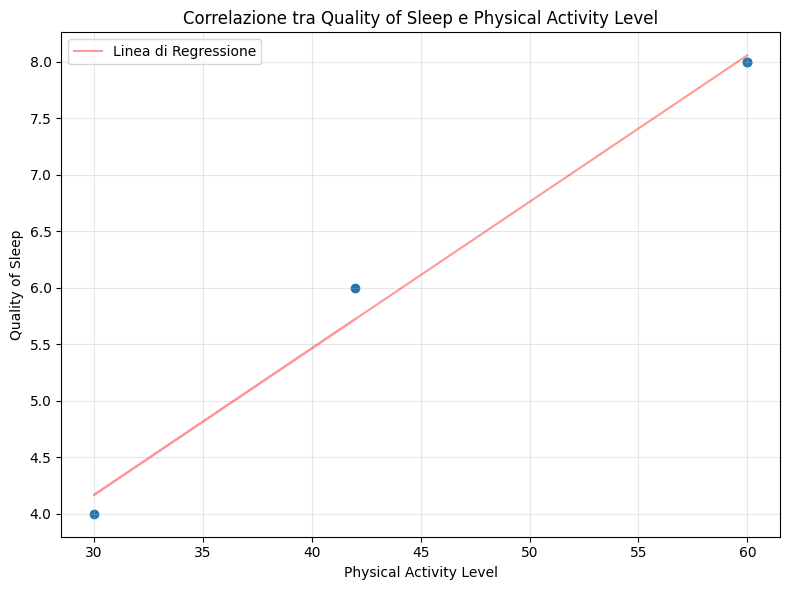

In [85]:
import numpy as np

# crea un grafico che mostra la correlazione tra Quality of Sleep e Physical Activity Level
plt.figure(figsize=(8, 6))
plt.scatter(subset_software_engineer['Physical Activity Level'], subset_software_engineer['Quality of Sleep'])
plt.title('Correlazione tra Quality of Sleep e Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')
plt.grid(alpha=0.3)
# aggiungi una linea di regressione
m, b = np.polyfit(subset_software_engineer['Physical Activity Level'], subset_software_engineer['Quality of Sleep'], 1)
plt.plot(subset_software_engineer['Physical Activity Level'], m * subset_software_engineer['Physical Activity Level'] + b, color='red', linestyle='-', alpha=0.4, label='Linea di Regressione')
plt.legend()
plt.tight_layout()
plt.show()